In [1]:
# Necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
#load the dataset
df_boston = pd.read_csv('/Users/rao/Downloads/boston_data.csv')
# df_boston = pd.read_csv('/Users/rdm/Desktop/boston_data.csv')

# df_boston = pd.read_csv("./boston_data.csv")

df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#data cleaning
df_boston.shape

(511, 14)

In [4]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [5]:
# Checking if we have any missing values
missing_values = df_boston.isna().sum()
print(missing_values)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


<AxesSubplot:>

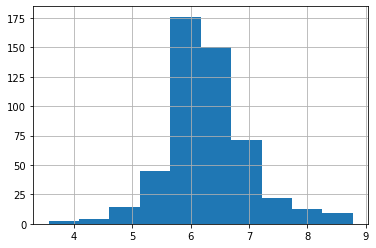

In [6]:
df_boston['RM'].hist()

In [7]:
# Replacing missing values in 'RM' with the mean value in df_boston
df_boston['RM'] = df_boston['RM'].fillna(df_boston['RM'].mean())

# Verifying if there are still any missing values in 'RM'
missing_values_rm = df_boston['RM'].isna().sum()
missing_values_rm

0

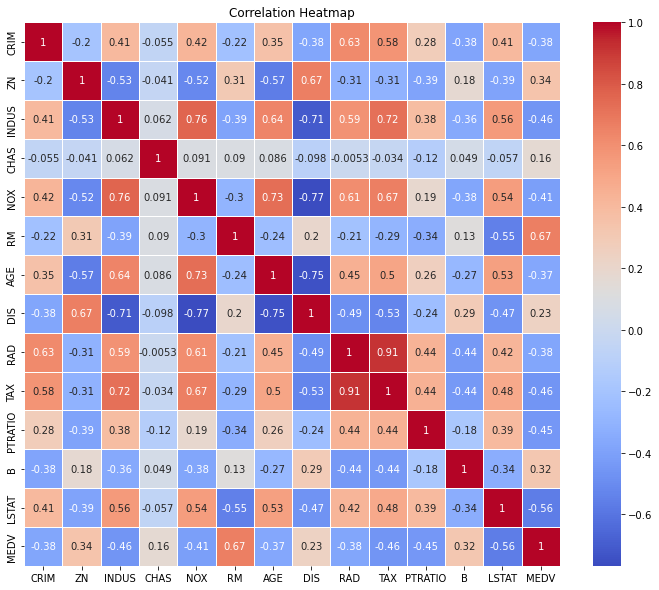

In [8]:
#Data Analysis and Visualization
#Checking the correlation of every variable with the target variable(MEDV)
correlation_matrix = df_boston.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

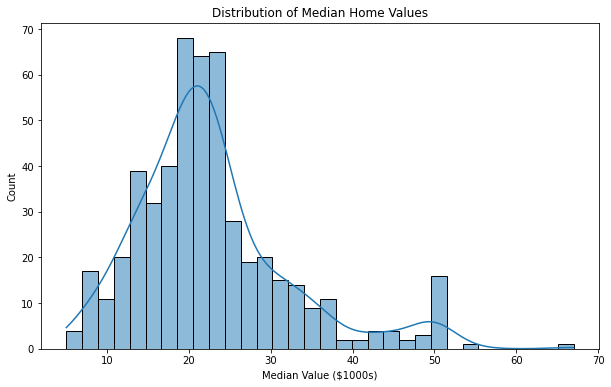

In [9]:
#understanding the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df_boston['MEDV'], kde=True)
plt.title('Distribution of Median Home Values')
plt.xlabel('Median Value ($1000s)')
plt.show()

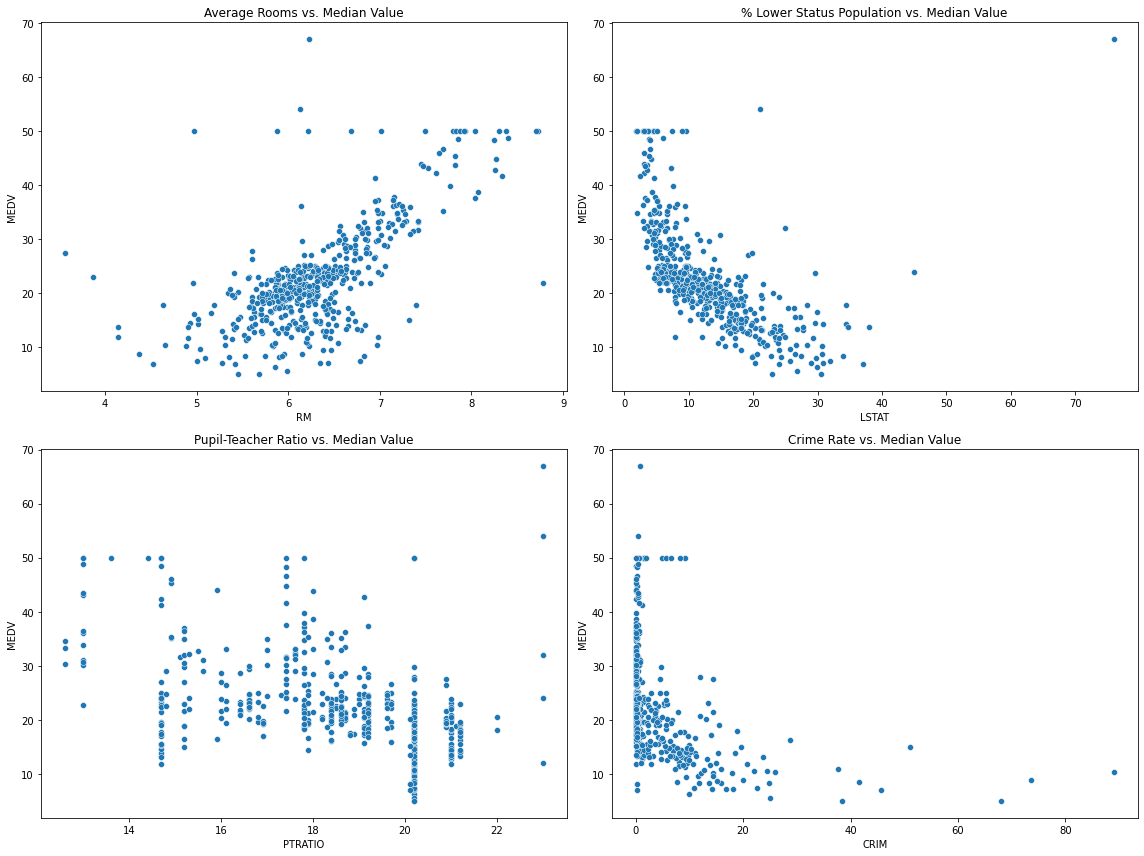

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(data=df_boston, x='RM', y='MEDV', ax=axes[0, 0])
axes[0, 0].set_title('Average Rooms vs. Median Value')

sns.scatterplot(data=df_boston, x='LSTAT', y='MEDV', ax=axes[0, 1])
axes[0, 1].set_title('% Lower Status Population vs. Median Value')

sns.scatterplot(data=df_boston, x='PTRATIO', y='MEDV', ax=axes[1, 0])
axes[1, 0].set_title('Pupil-Teacher Ratio vs. Median Value')

sns.scatterplot(data=df_boston, x='CRIM', y='MEDV', ax=axes[1, 1])
axes[1, 1].set_title('Crime Rate vs. Median Value')

plt.tight_layout()
plt.show()

In [11]:
# Calculate the percentage of properties near the Charles River
percentage_near_river = (df_boston['CHAS'].sum() / len(df_boston)) * 100
print(percentage_near_river)

6.8493150684931505


In [12]:
# Deleting the attribute CHAS
df_boston = df_boston.drop(columns = ["CHAS"])
df_boston.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
#Dimensionality reduction and feature engineering
#removing outliers
# Calculate Q1, Q3, and IQR for each column
Q1 = df_boston.quantile(0.25)
Q3 = df_boston.quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

# Define outliers: a value is an outlier if it's outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = (df_boston < (Q1 - 1.5 * IQR)) | (df_boston > (Q3 + 1.5 * IQR))

# Add a flag column to indicate rows with outliers
# Each column will have a boolean column indicating whether that row has an outlier
for column in df_boston.columns:
    if column in outliers:
        df_boston[f"{column}_outlier"] = outliers[column]

# Optional: Count total outlier flags per row
df_boston["total_outliers"] = outliers.sum(axis=1)

# Display rows with at least one outlier
outlier_rows = df_boston[df_boston["total_outliers"] > 0]
outlier_rows

CRIM         0.082325
ZN           0.000000
INDUS        5.190000
NOX          0.449000
RM           5.887500
AGE         45.050000
DIS          2.100350
RAD          4.000000
TAX        279.500000
PTRATIO     17.400000
B          374.710000
LSTAT        7.065000
MEDV        17.050000
Name: 0.25, dtype: float64
CRIM         3.621175
ZN          12.500000
INDUS       18.100000
NOX          0.624000
RM           6.627000
AGE         94.050000
DIS          5.118000
RAD         24.000000
TAX        666.000000
PTRATIO     20.200000
B          396.210000
LSTAT       17.105000
MEDV        25.000000
Name: 0.75, dtype: float64
CRIM         3.53885
ZN          12.50000
INDUS       12.91000
NOX          0.17500
RM           0.73950
AGE         49.00000
DIS          3.01765
RAD         20.00000
TAX        386.50000
PTRATIO      2.80000
B           21.50000
LSTAT       10.04000
MEDV         7.95000
dtype: float64


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,...,RM_outlier,AGE_outlier,DIS_outlier,RAD_outlier,TAX_outlier,PTRATIO_outlier,B_outlier,LSTAT_outlier,MEDV_outlier,total_outliers
18,0.80271,0.0,8.14,0.538,5.456,36.6,3.7965,4,307,21.0,...,False,False,False,False,False,False,True,False,False,1
25,0.84054,0.0,8.14,0.538,5.599,85.7,4.4546,4,307,21.0,...,False,False,False,False,False,False,True,False,False,1
27,0.95577,0.0,8.14,0.538,6.047,88.8,4.4534,4,307,21.0,...,False,False,False,False,False,False,True,False,False,1
32,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,4,307,21.0,...,False,False,False,False,False,False,True,False,False,1
34,1.61282,0.0,8.14,0.538,6.096,96.9,3.7598,4,307,21.0,...,False,False,False,False,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,14.33370,0.0,18.10,0.614,6.229,88.0,1.9512,24,666,20.2,...,False,False,False,False,False,False,False,False,False,1
490,0.20746,0.0,27.74,0.609,5.093,98.0,1.8226,4,711,20.1,...,False,False,False,False,False,False,True,False,False,1
508,0.44433,0.0,12.50,0.561,6.123,98.0,2.9870,3,320,23.0,...,False,False,False,False,False,False,False,False,True,1
509,0.77763,0.0,12.70,0.561,6.222,34.0,2.5430,3,329,23.0,...,False,False,False,False,False,False,False,True,True,2


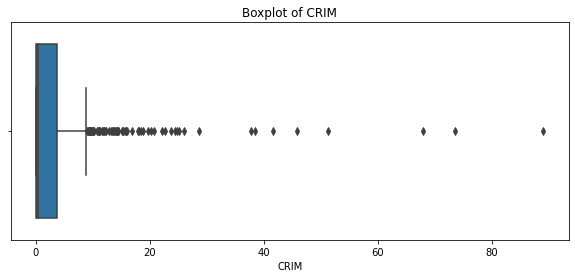

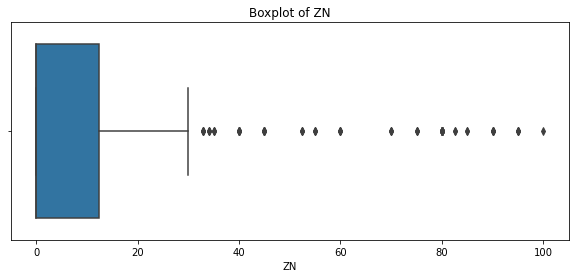

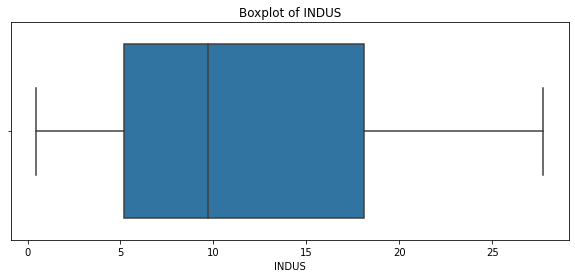

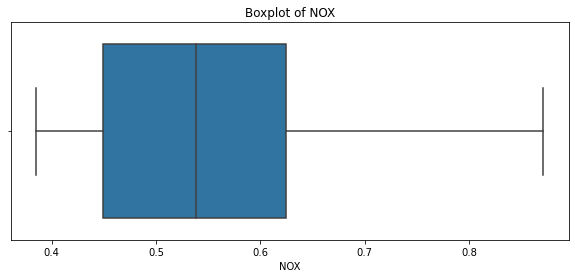

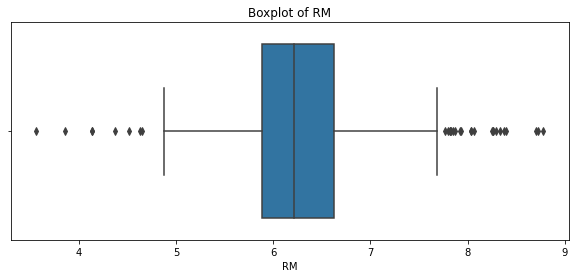

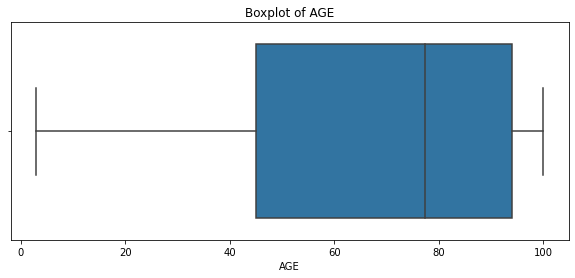

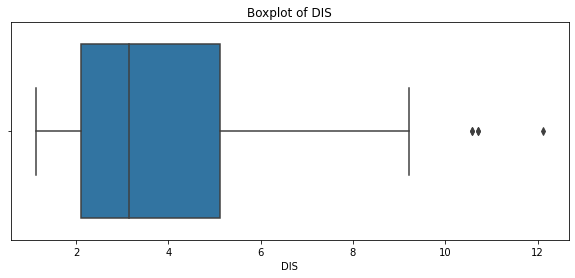

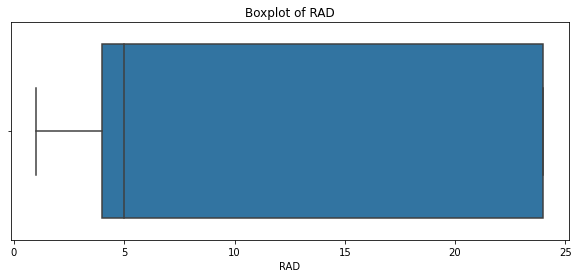

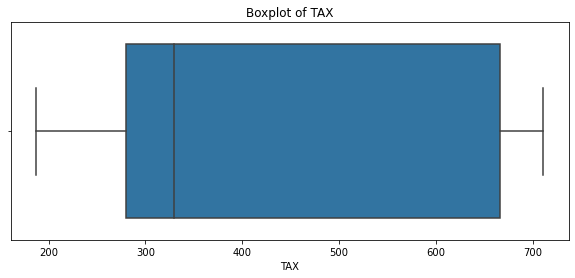

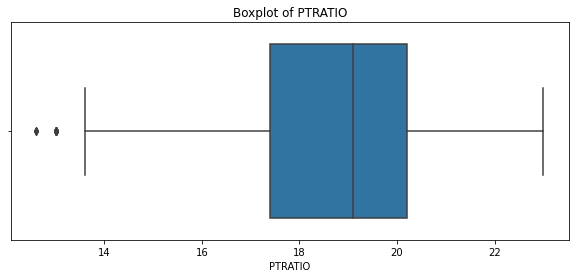

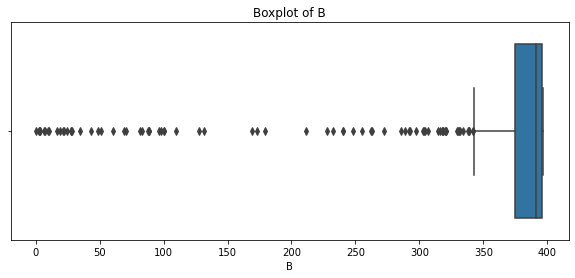

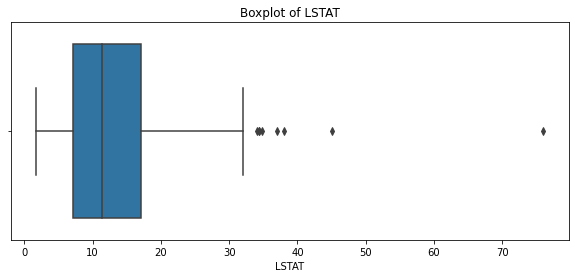

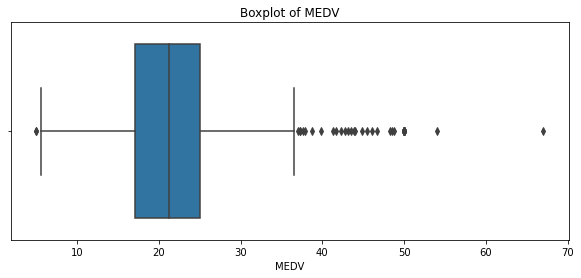

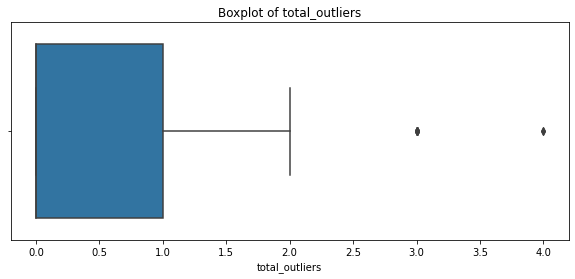

In [14]:
for column in df_boston.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df_boston[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [15]:
# Removing rows that have been flagged with at least one outlier
df_cleaned = df_boston[df_boston["total_outliers"] == 0]

# Drop the outlier flag columns since they are no longer needed
outlier_columns = [col for col in df_cleaned.columns if col.endswith('_outlier')]
df_cleaned.drop(columns=outlier_columns + ["total_outliers"], inplace=True)

df_cleaned2 = df_cleaned.copy()
df_cleaned2.shape

/Users/rao/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(291, 13)

In [16]:
#adding feature interaction between:
# NOX * INDUS as both are highly correlated and related to industrial characteristics
#RM * LSTAT as these features show strong correlations with the target variable (MEDV) and might interact in determining house prices

df_cleaned2['NOX_INDUS'] = df_cleaned2['NOX'] * df_cleaned2['INDUS']
df_cleaned2['RM_LSTAT'] = df_cleaned2['RM'] * df_cleaned2['LSTAT']



In [17]:
df_cleaned2.head()

df_cleaned2.shape

(291, 15)

In [ ]:
# df_cleaned2.to_csv("raw_data/cleaned_boston_data.csv", index = False)